# Fast Fourier transform

In [71]:
import cmath
import numpy as np
import math
import matplotlib.pyplot as plt

In [80]:
def fft(number, inverse=False):
    N = len(number)
    if N <= 1:
        return number.astype(complex)
    omega = cmath.exp(2j * math.pi / N) 
    if inverse:
        omega = 1 / omega

    even, odd = fft(number[::2], inverse), fft(number[1::2], inverse)

    omega_pow = 1
    result = np.empty(N, dtype=complex)
    for i in range(N // 2):
        result[i] = even[i] + omega_pow * odd[i]
        result[i + N // 2] = even[i] - omega_pow * odd[i]
        omega_pow *= omega
    return result

In [81]:
def test(f, remainder_size_ratio=1, axes=plt):
    N = 128
    lower_bound = 0
    upper_bound = 10

    f = np.vectorize(f)
    x = np.linspace(lower_bound, upper_bound, N + 1)[:-1]
    y = np.apply_along_axis(f, 0, x)
    axes.plot(x, y, label="Source ({} points)".format(N))

    y_fft = fft(y)
    reduced_N = int(N * remainder_size_ratio)
    y_fft[reduced_N:N] = 0
    y_recv = fft(y_fft, True) / N

    axes.plot(x, y_recv, label="IDFT ({} points)".format(reduced_N))
    axes.legend()

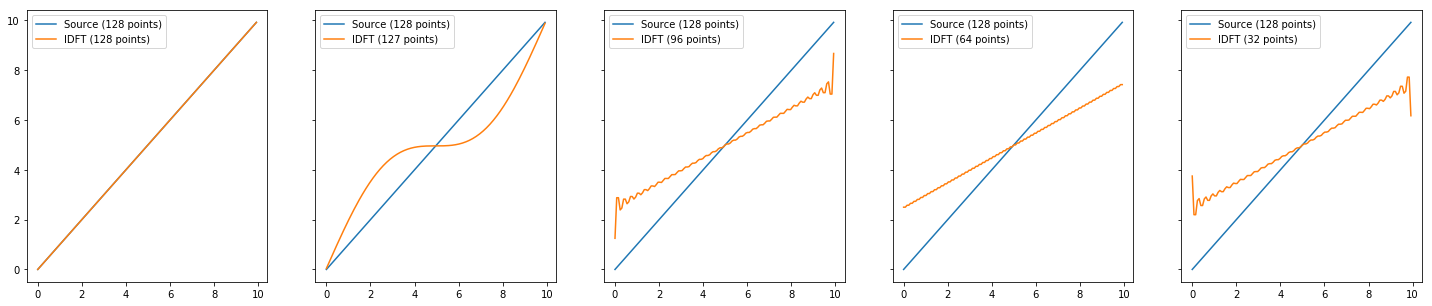

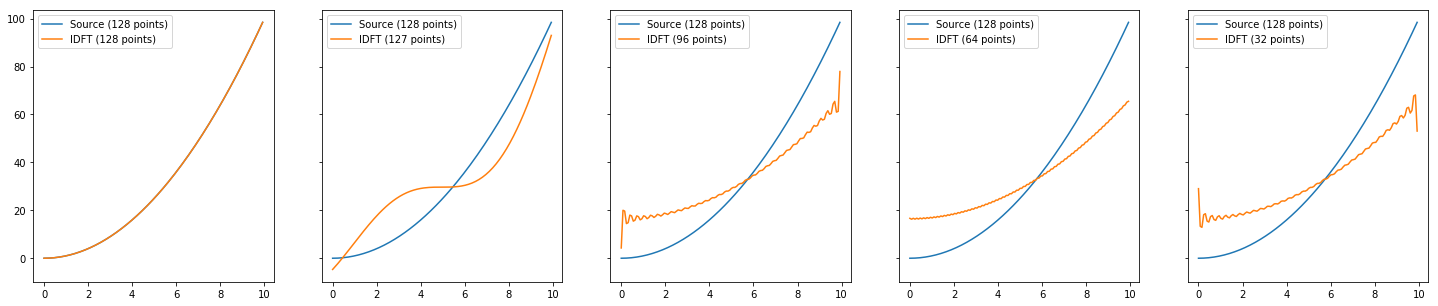

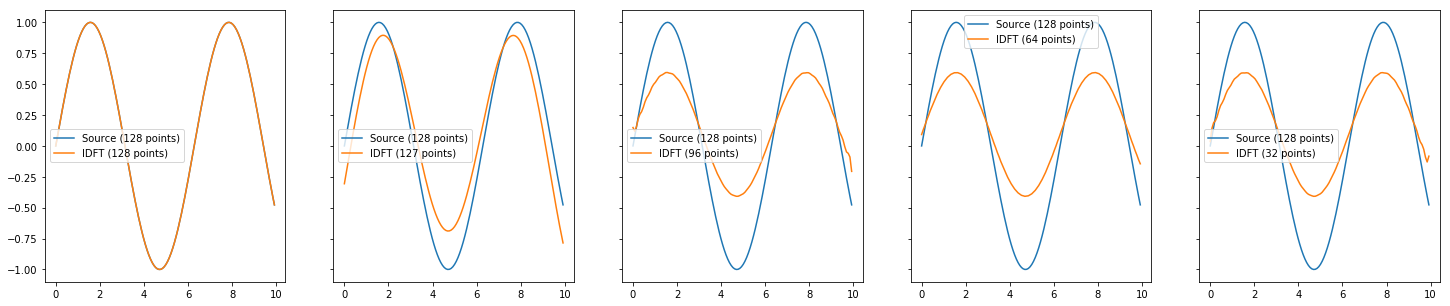

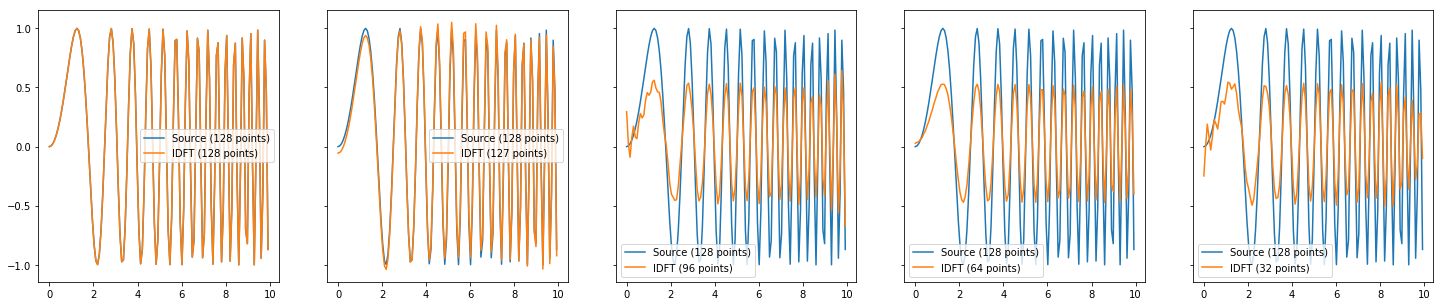

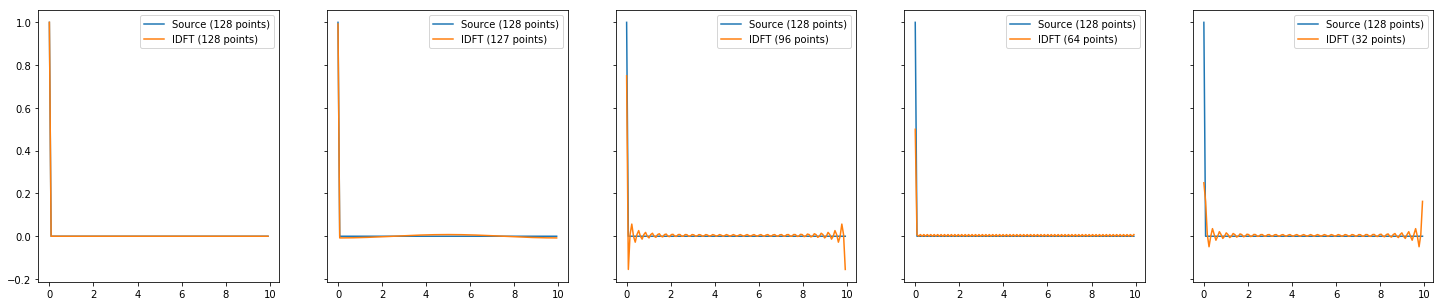

In [82]:
f_list = [
    lambda x: x,
    lambda x: x**2,
    lambda x: round(math.sin(x), 5),
    lambda x: round(math.sin(x**2), 5),
    lambda x: round(math.sin(x) / x if x != 0 else 1, 5),
]
coefs = [1, 127/128, 96/128, 64/128, 32/128]

for i in range(len(f_list)):
    fig, ax = plt.subplots(1, len(coefs), sharey='row')
    for j in range(len(coefs)):
        test(f_list[i], coefs[j], ax[j])
    fig.set_size_inches(len(coefs) * 5, 5)
    

    plt.show()